# スプライン回帰

In [68]:
# load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn
import copy

In [69]:
# generate data
n = 100
x = randn(n) * 2 * np.pi
y = np.sin(x) + (0.2 * randn(n))

In [70]:
# setting
col_set = ['red', 'green', 'blue']
K_set = [5, 7, 9]  # list of number for deviding x-axis

(-5.0, 5.0)

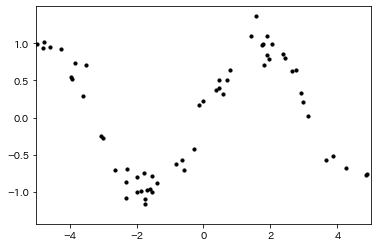

In [71]:
# plot initial data
plt.scatter(x, y, c='black', s = 10)
plt.xlim(-5, 5)

In [97]:
for k in range(3):
    K = K_set[k]
    knots = np.linspace(-2*np.pi, 2*np.pi, K)
    X = np.zeros((n, K+4))
    for i in range(n):
        X[i, 0] = 1
        X[i, 1] = x[i]
        X[i, 2] = x[i]**2
        X[i, 3] = x[i]**3
        for j in range(K):
            X[i, j+4] = np.maximum((x[i]-knots[j])**3, 0)
    #print(X[0:1,])
    beta = np.linalg.inv(X.T@X)@X.T@y
    print(beta)

[-4.08446113 -1.54159013 -0.17223468 -0.00584324  0.01709465 -0.00868293
 -0.02669806  0.0582057  -0.06116591]
[ 1.55395539e+01  4.97817896e+00  4.91903384e-01  1.50290344e-02
 -1.51524372e-01  3.35678014e-01 -2.86949052e-01 -3.83294004e-02
  3.83032498e-01 -4.60903802e-01  2.48099543e-01]
[ 1.70694069e+01  5.44686532e+00  5.37010376e-01  1.63923573e-02
 -1.91846319e-01  2.96979896e-01  2.00224939e-02 -2.94708659e-01
  7.50217581e-02  1.16269995e-01  2.37969389e-01 -6.06442598e-01
  3.87763376e-01]


In [104]:
# define function to generate matrix X from vector x
def genMat(x, k):
    n = len(x)
    knots = np.linspace(-2*np.pi, 2*np.pi, k)   # devide by number K
    X = np.array([x ** i for i in range(4)]).T  # refactored
    X_diff = (np.tile(X[:,1],(k,1)).T - np.tile(knots,(n,1)))**3
    X_diff = np.where(X_diff < 0, 0, X_diff)
    X = np.hstack((X,X_diff))
    return(X)

[-4.08446113 -1.54159013 -0.17223468 -0.00584324  0.01709465 -0.00868293
 -0.02669806  0.0582057  -0.06116591]
[ 1.55395539e+01  4.97817896e+00  4.91903384e-01  1.50290344e-02
 -1.51524372e-01  3.35678014e-01 -2.86949052e-01 -3.83294004e-02
  3.83032498e-01 -4.60903802e-01  2.48099543e-01]
[ 1.70694069e+01  5.44686532e+00  5.37010376e-01  1.63923573e-02
 -1.91846319e-01  2.96979896e-01  2.00224939e-02 -2.94708659e-01
  7.50217581e-02  1.16269995e-01  2.37969389e-01 -6.06442598e-01
  3.87763376e-01]


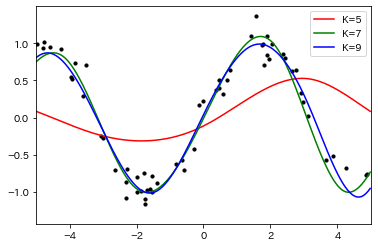

In [121]:
# calculate beta for each devided area
# assumption : polinomial is 3 dimensions
# check whether I can get the same results with original code
plt.scatter(x, y, c='black', s = 10)
plt.xlim(-5, 5)

for k in range(len(K_set)):
    K = K_set[k]
    X = genMat(x,K)
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    print(beta)  # result check
    
    u_seq = np.arange(-5, 5, 0.02)
    S = genMat(u_seq, K) @ beta
    
    plt.plot(u_seq, S, c=col_set[k], label='K={}'.format(K))
plt.legend()

In [8]:
np.linspace(-2*np.pi, 2*np.pi, 5)

array([-6.28318531, -3.14159265,  0.        ,  3.14159265,  6.28318531])